<a href="https://colab.research.google.com/github/sk-choi/Toy_Project/blob/main/AI_Character_Comparing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이 토이 프로젝트는 양재 AI허브에서 주관하는 <인공지능 모델 개발 트랙>에서 배운 교육을 바탕으로 구성한 코드입니다.

모델은 CNN 모델을 사용하였으며, 서로 비슷하게 생긴 캐릭터를 비교하는 인공지능을 구현한 코드입니다.

이 모델에서 사용한 캐릭터는 세이버라는 캐릭터와 바이올렛이라는 캐릭터입니다.

모델의 부족한 부분은 차츰 보완할 생각입니다.

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import os, re, glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

imagePath = '/content/gdrive/MyDrive/downloads/image_sample'
categories = ["fate stay night saber","violet evergaden"]
nb_classes = len(categories)

image_w = 64
image_h = 64

X = []
Y = []

for idx, cat in enumerate(categories):#[0, "fate stay night saber"], [1, violet evergaden]
    label = [0 for i in range(nb_classes)] #[0,0].[0,0]
    label[idx] = 1 #[1,0], [0,1]
    image_dir = imagePath+'/'+cat+'/'

    for top, dir, f in os.walk(image_dir):
        for filename in f:
            print(image_dir+filename)
            img = cv2.imread(image_dir+filename)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, None, fx=64/img.shape[1], fy=64/img.shape[0])
            
            X.append(img/256)
            Y.append(label)

X = np.array(X)
Y = np.array(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
xy = (X_train, X_test, Y_train, Y_test)

#출처: https://hoony-gunputer.tistory.com/entry/keras-색상있는-이미지-분류하기1 [후니의  컴퓨터:티스토리]

/content/gdrive/MyDrive/downloads/image_sample/fate stay night saber/58.jpg
/content/gdrive/MyDrive/downloads/image_sample/fate stay night saber/66.jpg
/content/gdrive/MyDrive/downloads/image_sample/fate stay night saber/10.jpg
/content/gdrive/MyDrive/downloads/image_sample/fate stay night saber/76.jpg
/content/gdrive/MyDrive/downloads/image_sample/fate stay night saber/16.jpg
/content/gdrive/MyDrive/downloads/image_sample/fate stay night saber/84.jpg
/content/gdrive/MyDrive/downloads/image_sample/fate stay night saber/38.jpg
/content/gdrive/MyDrive/downloads/image_sample/fate stay night saber/40.jpg
/content/gdrive/MyDrive/downloads/image_sample/fate stay night saber/26.jpg
/content/gdrive/MyDrive/downloads/image_sample/fate stay night saber/64.jpg
/content/gdrive/MyDrive/downloads/image_sample/fate stay night saber/65.jpg
/content/gdrive/MyDrive/downloads/image_sample/fate stay night saber/11.jpg
/content/gdrive/MyDrive/downloads/image_sample/fate stay night saber/62.jpg
/content/gdr

In [ ]:
print(categories[Y[0][0]])
print(categories[Y[0][1]])

violet evergaden
fate stay night saber


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
def load_data():
    X_train, X_test, Y_train, Y_test = xy
    X_train = X_train/255.0
    X_test = X_test/255.0

    X_train = np.expand_dims(X_train, axis = -1)
    X_test = np.expand_dims(X_test, axis = -1)

    Y_train = to_categorical(Y_train, num_classes = 2)
    Y_test = to_categorical(Y_test, num_classes = 2)

    return  X_train, X_test, Y_train, Y_test


In [ ]:
print(len(Y_test))

46


In [ ]:
def build_cnn_model(num_classes, input_shape):
  model = Sequential()

  model.add(Input(shape=input_shape))
  model.add(Conv2D(32, (3,3), padding='same', activation = 'relu'))#뉴런의 개수와 필터의 개수,  패딩은 same으로, 인풋이 그대로
  model.add(Conv2D(32, (3,3), padding='same', activation = 'relu'))
  model.add(MaxPool2D())

  model.add(Conv2D(32, (3,3), padding='same', activation = 'relu'))#뉴런의 개수와 필터의 개수,  패딩은 same으로, 인풋이 그대로
  model.add(Conv2D(32, (3,3), padding='same', activation = 'relu'))
  model.add(MaxPool2D())

  model.add(Conv2D(32, (3,3), padding='same', activation = 'relu'))#뉴런의 개수와 필터의 개수,  패딩은 same으로, 인풋이 그대로
  model.add(Conv2D(32, (3,3), padding='same', activation = 'relu'))
  model.add(GlobalAveragePooling2D())

  model.add(Dense(num_classes, activation = 'sigmoid'))

  return model

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6926 - accuracy: 0.5321 - val_loss: 0.6911 - val_accuracy: 0.5357
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.6906 - accuracy: 0.5138 - val_loss: 0.6889 - val_accuracy: 0.6071
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.6881 - accuracy: 0.7156 - val_loss: 0.6857 - val_accuracy: 0.5357
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.6832 - accuracy: 0.6055 - val_loss: 0.6792 - val_accuracy: 0.7143
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.6761 - accuracy: 0.7339 - val_loss: 0.6704 - val_accuracy: 0.6786
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.6667 - accuracy: 0.7339 - val_loss: 0.6651 - val_accuracy: 0.5714
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.6564 - accuracy: 0.6606 - val_loss: 0.6546 - val_accuracy: 0.5714
Epoch 8/10
1/1 [=========================

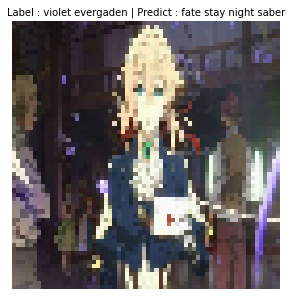

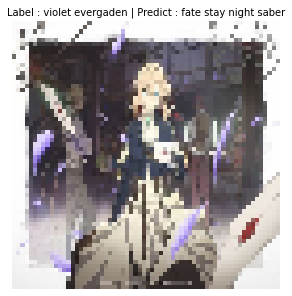

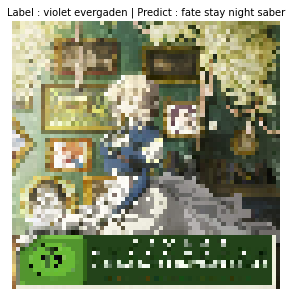

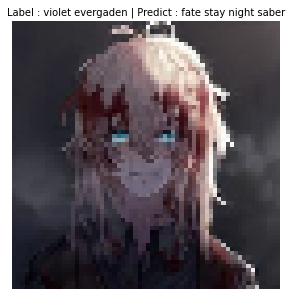

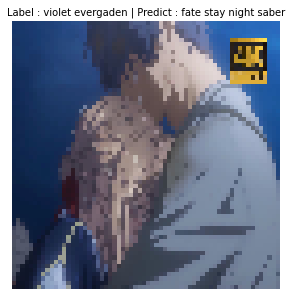

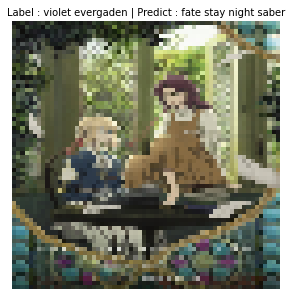

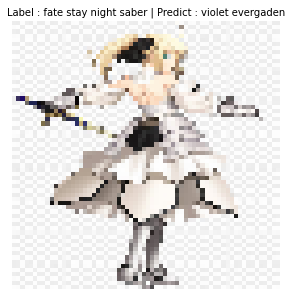

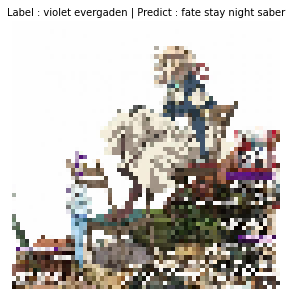

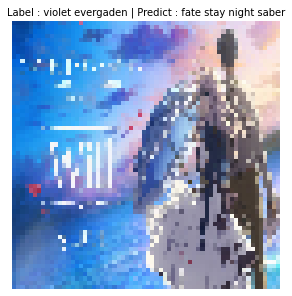

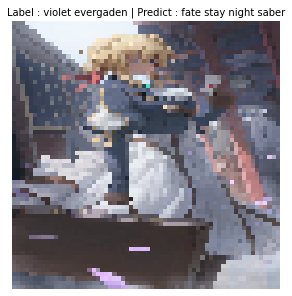

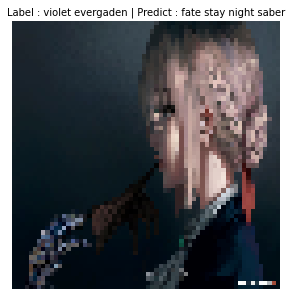

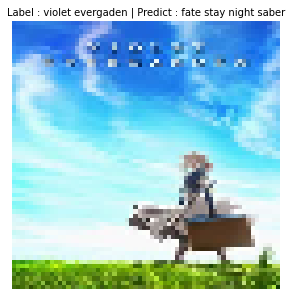

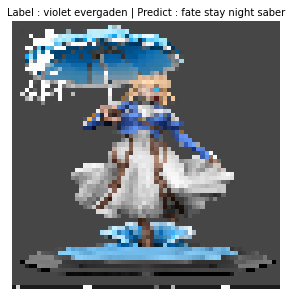

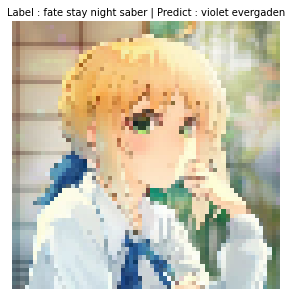

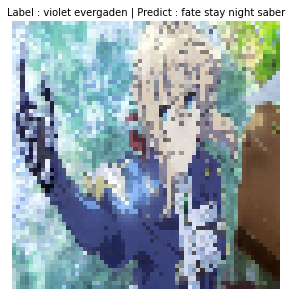

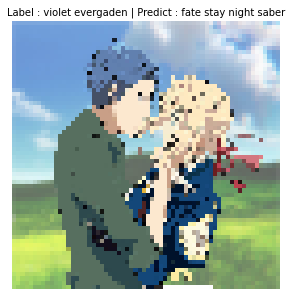

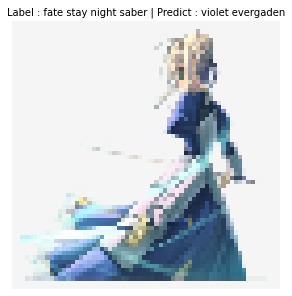

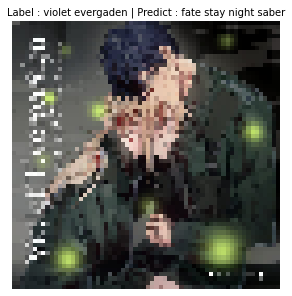

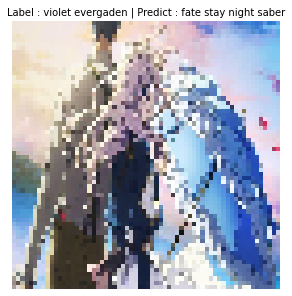

In [ ]:
def main(cnn_model = None, epochs = 10):
  X_train, X_test, Y_train, Y_test =  xy
  num_classes = 2
  input_shape = X_train[0].shape
  cnn_model = build_cnn_model(num_classes, input_shape)
  cnn_model.compile(optimizer = Adam(learning_rate = 10**(-3)), loss = 'categorical_crossentropy', metrics = 'accuracy')

  #모델의 optimizer, loss, matrics  컴파일

  hist = cnn_model.fit(X_train, Y_train, batch_size = 128, epochs = epochs, validation_split = 0.2, shuffle = True)
  test_loss, test_accuracy = cnn_model.evaluate(X_test, Y_test)
  y_pred = cnn_model.predict(X_test)
 
  print(f"테스트 정확도: {test_accuracy * 100:.3f}%")

  wrong_result = []
  for n in range(0, len(Y_test)):
      if np.argmax(y_pred[n], axis=-1) != np.argmax(Y_test[n]):
          wrong_result.append(n)

  print(len(wrong_result))

  for n in wrong_result:
    plt.subplots(constrained_layout=True)
    plt.imshow(X_test[n])
    plt.title('Label : ' + categories[np.argmax(Y_test[n])] + " | Predict : " + categories[np.argmax(y_pred[n], axis=-1)], fontsize=10)
    plt.axis('off')

    
main()

모델을 실행해보면 대략적으로 60~70%선으로 이미지를 구분한다는 것을 알 수 있습니다. (간혹 50%가 나오긴 합니다.)


결과를 바탕으로 이 모델에서 보완해야 할 점을 생각해보았습니다.

첫번째. 수집할 데이터 수 늘리기
두 카테고리의 데이터를 모두 합해서 이미지가 200장이 안됩니다.
Accuracy를 향상시키기 위해선 데이터의 수를 늘릴 필요가 있습니다.

두번째. 데이터 전처리 할 것(캐릭터에 해당하는 그림만 남길 것)
이미지 데이터 중 어떤 이미지는 여러 캐릭터가 등장하거나 전혀 다른 캐릭터가 등장하는 이미지라서 데이터를 가공해야 한다는 것을 깨닫게 되었습니다.

이러한 점을 고려하고 데이터의 특성에 맞게 모델의 레이어나 배치 사이즈와 같은 
요소들을 고려한다면 좀 더 향상된 결과를 도출할 수 있다는 생각이 들게 되었습니다.
